In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [4]:
df = pd.read_csv("data_AAL.csv")   # change dataset name

In [5]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-15,34.65,35.240,33.68,33.75,6389276,2019-04-15,33.4347,2019-04-15,54.4682,2019-04-15,78.7540
1,1,2019-04-12,34.99,35.235,34.50,34.69,4610524,2019-04-12,33.3862,2019-04-12,62.6496,2019-04-12,80.7188
2,2,2019-04-11,33.99,34.970,33.91,34.81,7352414,2019-04-11,33.1856,2019-04-11,63.7853,2019-04-11,75.7918
3,3,2019-04-10,33.76,34.130,33.09,34.02,7159491,2019-04-10,32.9357,2019-04-10,59.2719,2019-04-10,68.3457
4,4,2019-04-09,33.37,33.520,32.60,33.31,8119440,2019-04-09,32.7689,2019-04-09,54.5440,2019-04-09,67.7137


In [6]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    33.75
1    34.69
2    34.81
3    34.02
4    33.31
Name: close, dtype: float64

In [7]:
len(close)

3396

In [8]:
train = close.loc[:len(close) - int(len(close)*0.15) -1]
test = close.loc[len(close) - int(len(close)*0.15):]
print(train.tail())
print(test.head())

2882    27.66
2883    28.47
2884    27.07
2885    27.35
2886    27.39
Name: close, dtype: float64
2887    28.74
2888    28.67
2889    26.50
2890    26.38
2891    27.72
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

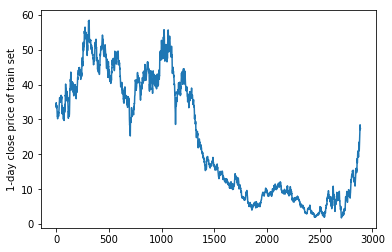

In [9]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

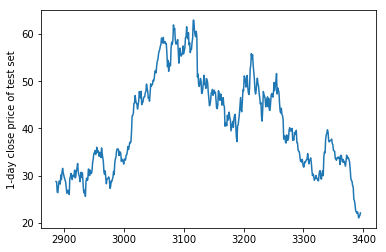

In [10]:
test.plot()
plt.ylabel('1-day close price of test set')

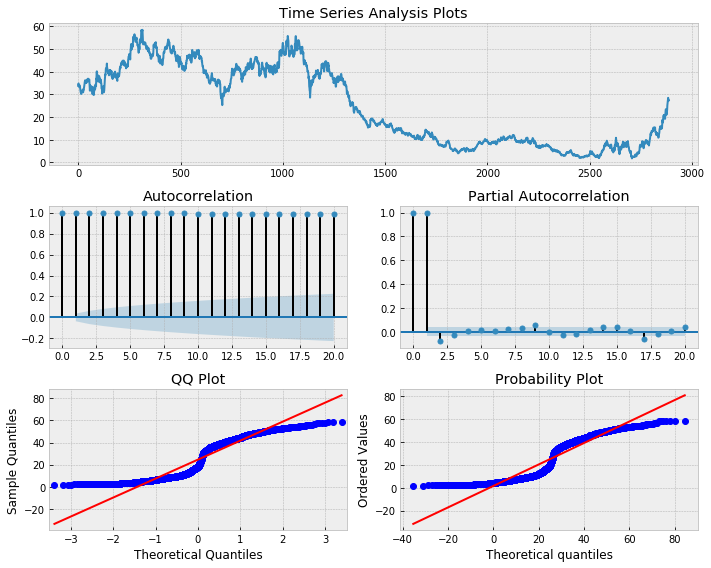

In [11]:
tsplot(train, lags=20)

In [12]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-1.2312615407685035,
 0.6600053308867014,
 1,
 2885,
 {'1%': -3.432618675186974,
  '5%': -2.8625423474529024,
  '10%': -2.5673035783905878},
 6171.6103866507965)

Text(0,0.5,'Difference in 1-day close price')

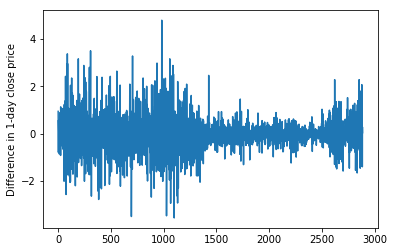

In [13]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [14]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-51.31962321009755,
 0.0,
 0,
 2885,
 {'1%': -3.432618675186974,
  '5%': -2.8625423474529024,
  '10%': -2.5673035783905878},
 6169.854013024415)

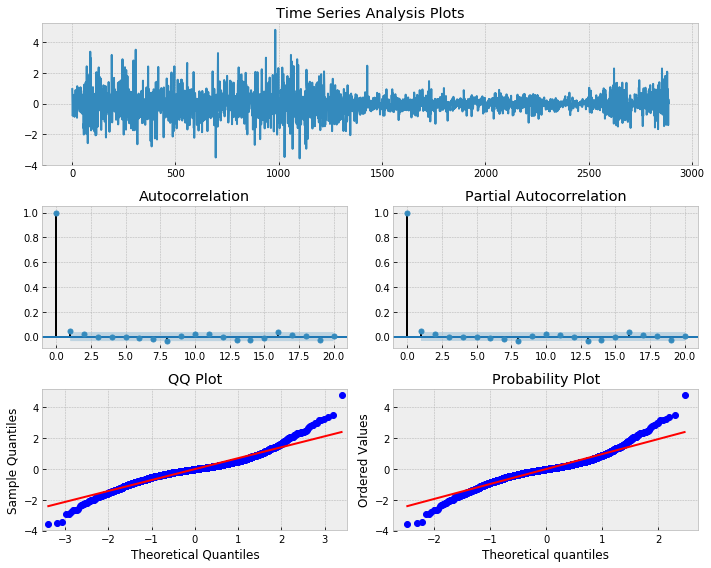

In [15]:
tsplot(train_diff, lags=20)

### Fit Model

In [16]:
arima210 = smt.ARIMA(train, (2,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima210_fit = arima210.fit() #change model name*2
arima210_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 2886
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -3100.974
Method:                       css-mle   S.D. of innovations              0.709
Date:                Wed, 17 Apr 2019   AIC                           6209.948
Time:                        15:40:22   BIC                           6233.819
Sample:                             1   HQIC                          6218.551
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0022      0.014     -0.155      0.877      -0.030       0.025
ar.L1.D.close     0.0447      0.019      2.400      0.016       0.008       0.081
ar.L2.D.close     0.0183      0.019      0.984      0.325      -0.018       0.055
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.2700           +0.0000j            6.2700            0.0000
AR.2           -8.7097           +0.0000j            8.7097            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 2886
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3101.458
Method:                       css-mle   S.D. of innovations              0.709
Date:                Wed, 17 Apr 2019   AIC                           6208.916
Time:                        15:40:48   BIC                           6226.819
Sample:                             1   HQIC                          6215.369
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0022      0.014     -0.158      0.874      -0.029       0.025
ar.L1.D.close     0.0455      0.019      2.447      0.014       0.009       0.082
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           21.9748           +0.0000j           21.9748            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
arima111 = smt.ARIMA(train, (1,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima111_fit = arima111.fit() #change model name*2
arima111_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 2886
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3101.087
Method:                       css-mle   S.D. of innovations              0.709
Date:                Wed, 17 Apr 2019   AIC                           6210.174
Time:                        15:45:02   BIC                           6234.045
Sample:                             1   HQIC                          6218.778
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0022      0.014     -0.155      0.877      -0.030       0.025
ar.L1.D.close     0.3168      0.273      1.160      0.246      -0.218       0.852
ma.L1.D.close    -0.2710      0.277     -0.979      0.328      -0.814       0.272
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.1562           +0.0000j            3.1562            0.0000
MA.1            3.6897           +0.0000j            3.6897            0.0000
-----------------------------------------------------------------------------
"""

### Analyze residuals

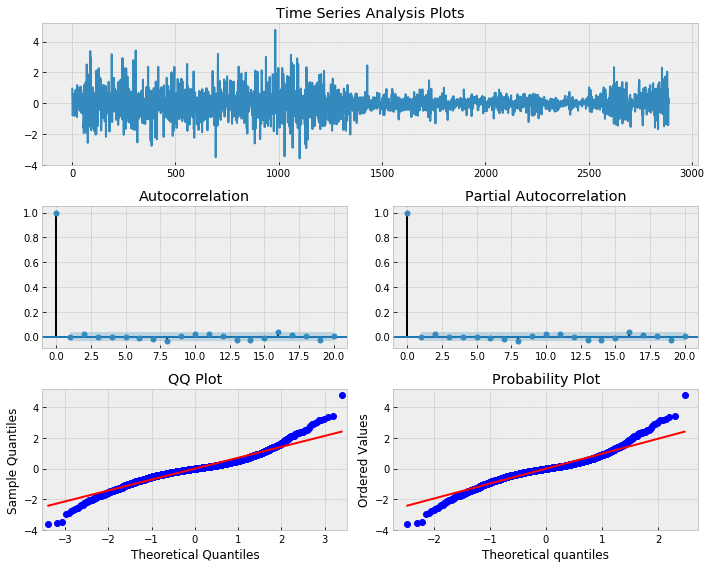

In [19]:
tsplot(arima110_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [20]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima110_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([1.17271857]), array([0.94746772]))

### Forecasting

In [21]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima110_fit.forecast(steps=num_steps)   #change model name

In [22]:
arima110_fit.forecast(steps=num_steps)   #change model name

(array([27.38973232, 27.3876322 , 27.3854487 , 27.38326139, 27.38107392]),
 array([0.70872863, 1.02535276, 1.26592949, 1.46761911, 1.64476099]),
 array([[26.00064974, 28.77881491],
        [25.37797773, 29.39728668],
        [24.90427249, 29.8666249 ],
        [24.5067808 , 30.25974199],
        [24.1574016 , 30.60474623]]))

In [23]:
arima110_fit.forecast(steps=num_steps)[0][4]    #change model name

27.381073917451246

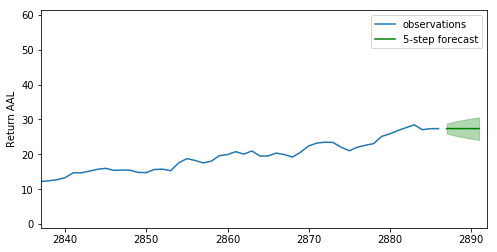

In [24]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return AAL')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [29]:
pred = []
for i in range( int(len(close)*0.15) ): 
    moving_train = close.loc[:len(close) -  int(len(close)*0.15)  -5 + i]
    moving_arima110 = smt.ARIMA(moving_train, (1,1,0))   #change model parameters  & model name
    moving_arima110_fit = moving_arima110.fit()   #change model name*2
    
    pred.append(moving_arima110_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

509

In [28]:
#(1,1,1)
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9743225942316848
MAE = 2.378070430975174
RMSE = 3.0594781463450325
Scaled MAE = 0.056715249963633994
Scaled RMSE = 0.07296632831731534


In [30]:
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9743491033633728
MAE = 2.3763026411800996
RMSE = 3.0578984491315078
Scaled MAE = 0.05667308946291675
Scaled RMSE = 0.07292865368784897
